In [1]:
# for data manipulation
import pandas as pd
import numpy as np
#for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
#for interactive plots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as plot_go
import cufflinks as cf
init_notebook_mode(connected=True) #for notebooks
cf.go_offline() #for offline use

# Import Dataset

In [2]:
df=pd.read_csv('Stock Exchange KSE 100(Pakistan).csv')

In [3]:
#let's explore the head and tail of the data
df.head()

,Date,Open,High,Low,Close,Change,Volume
0,23-Feb-21,"31,722.16","31,800.90","31,597.31","31,626.19",-21.38,"718,191,025"
1,22-Feb-21,"31,874.78","31,958.58","31,612.55","31,647.57",-203.61,"721,952,658"
2,19-Feb-21,"31,748.75","31,904.30","31,749.43","31,851.18",91.36,"694,795,084"
3,18-Feb-21,"32,049.85","32,104.67","31,745.72","31,759.82",-288.86,"577,837,595"
4,17-Feb-21,"32,166.21","32,390.77","32,044.01","32,048.68",-93.15,"701,658,181"


In [4]:
#let's know the columns of the datasets
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3221 entries, 0 to 3220
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    3221 non-null   object
 1   Open    3221 non-null   object
 2   High    3221 non-null   object
 3   Low     3221 non-null   object
 4   Close   3221 non-null   object
 5   Change  3221 non-null   object
 6   Volume  3221 non-null   object
dtypes: object(7)
memory usage: 176.3+ KB


In [5]:
df.describe().transpose()

,count,unique,top,freq
Date,3221,3221,3-Dec-09,1
Open,3221,3213,"6,639.13",2
High,3221,3215,"6,641.78",2
Low,3221,3211,"6,639.00",3
Close,3221,3209,"6,639.25",3
Change,3221,3104,0,5
Volume,3221,3220,"302,831,072",2


Great! there are no missing values to be handled

The dates of the dataset are not arranged in a correct way right now, let's fix the format into something more meaningful.

The format we want is year-month-day

In [11]:
#let's first check if we have the months named in a consistent manner
df['Date'].apply(lambda x: x.split('-')[1]).unique()

array(['Feb', 'Jan', 'Dec', 'Nov', 'Oct', 'Sep', 'Aug', 'Jul', 'Jun',
       'May', 'Apr', 'Mar'], dtype=object)

Great! they are arranged in a right way, let's now map the string of months to number

In [12]:
mon=df['Date'].apply(lambda x: x.split('-')[1]).unique()
num=np.array([2,1,12,11,10,9,8,7,6,5,4,3])
map_month={}
for mon,num in zip(mon,num):
    if num<10:
        map_month[mon]='0'+str(num)
    else:
        map_month[mon]=str(num)

In [13]:
#now let's take a look at our dictionary
map_month

{'Feb': '02',
 'Jan': '01',
 'Dec': '12',
 'Nov': '11',
 'Oct': '10',
 'Sep': '09',
 'Aug': '08',
 'Jul': '07',
 'Jun': '06',
 'May': '05',
 'Apr': '04',
 'Mar': '03'}

Now that we have made a dicitionary which could map months to number now let's move to the next stage to make the date display in more meaningful format.

In [14]:
def make_date(date):
    date=date.split('-')
    month=date[1]
    year=date[2]
    if len(date[0].strip())==2:
        day=date[0]
    else:
        day='0'+date[0].strip()
    return day,month,'20'+str(year)

In [15]:
#let's make a new dataframe which has this seperated date information
date_=df['Date'].apply(make_date).apply(pd.Series)
date_.columns='day month year'.split()

In [16]:
#let's concat them both
df=pd.concat([df,date_],axis=1)

We are almost there. let we first map our dictionary to the month columns. Next, we will spit out the corrected date. We will then replace it with our column of date.

In [17]:
df['month']=df['month'].map(map_month)

In [18]:
def correct_date(cols):
    day=cols[0]
    month=cols[1]
    year=cols[2]
    return year+'-'+month+'-'+day

In [19]:
df['Date']=df[['day','month','year']].apply(correct_date,axis=1)

In [20]:
df=df.iloc[:,:-3]

In [21]:
df.head()

,Date,Open,High,Low,Close,Change,Volume
0,2021-02-23,"31,722.16","31,800.90","31,597.31","31,626.19",-21.38,"718,191,025"
1,2021-02-22,"31,874.78","31,958.58","31,612.55","31,647.57",-203.61,"721,952,658"
2,2021-02-19,"31,748.75","31,904.30","31,749.43","31,851.18",91.36,"694,795,084"
3,2021-02-18,"32,049.85","32,104.67","31,745.72","31,759.82",-288.86,"577,837,595"
4,2021-02-17,"32,166.21","32,390.77","32,044.01","32,048.68",-93.15,"701,658,181"


Phew! The dates are now corrected. Now it is time to remove those commas from the open, high, low, close and volume columns and make them look like a number.

In [22]:
for col_name in ['Open','High','Low','Close','Change','Volume']:
    df[col_name]=df[col_name].astype(str).apply(lambda x : float(x.replace(',','')))

Hooray! Everything is done now. We can now start to visualize the data and gain insights out of it. Once we start to visulaize the data, everything would start to make more sense and the results will worth the efforts,

In [23]:
#let's also make the column for returns
df['Returns']=df['Close'].pct_change()

Great! This return column will help us identify the worst days of market crash. But first let's move to some visualizations

In [24]:
df.set_index('Date',inplace=True)

In [25]:
df=df.iloc[::-1]

In [26]:
df.index

Index(['2008-02-22', '2008-02-25', '2008-02-26', '2008-02-27', '2008-02-28',
       '2008-02-29', '2008-03-03', '2008-03-04', '2008-03-05', '2008-03-06',
       ...
       '2021-02-10', '2021-02-11', '2021-02-12', '2021-02-15', '2021-02-16',
       '2021-02-17', '2021-02-18', '2021-02-19', '2021-02-22', '2021-02-23'],
      dtype='object', name='Date', length=3221)

<AxesSubplot:>

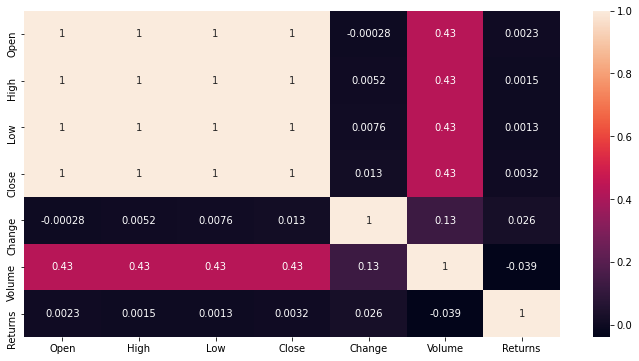

In [34]:
#let's check the correlation
correlation=df.corr()
plt.figure(figsize=(12,6))
sns.heatmap(correlation, xticklabels=correlation.columns, 
            yticklabels=correlation.columns, 
            annot=True)

Volume has the highest correaltion with the other variables which makes the perfect sense.

# Data Visualization

It is finally the time to have some real fun!

In [27]:
df['Close'].iplot(title='Closing of Index')

There are certain crashes in the market. We will discover them later.

In [28]:
df['Volume'].iplot(title='Volume of Index')

Let's keep the visualizations on a hold an start to gain insights form these visulaizations.

We will start the analysis from the most recent years and then go back to the early years.

<AxesSubplot:xlabel='Date'>

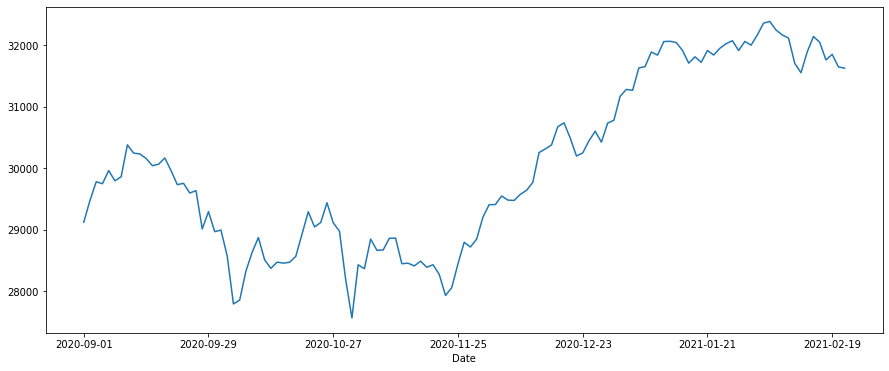

In [29]:
#let's see how the 2021 is going
df.loc['2020-09-01':]['Close'].plot(figsize=(15,6))

We could safely say that things are pretty stable and on right track

In [30]:
#let's check the year 2020, since the covid-19 started from the dec 2019 let's start the analysis from there
df.loc['2019-12-01':'2020-12-31']['Close'].iplot()

Dang! The market crash at March 26

In [42]:
#let's see how the returns have changed
df['Returns'].iplot()

<AxesSubplot:>

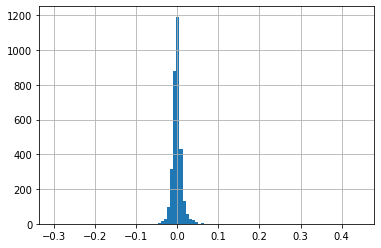

In [53]:
df['Returns'].hist(bins=100)

In [56]:
df['Returns'].idxmax()

'2010-05-28'

# Forecast

In [76]:
training_set=df.iloc[:3000,3:4]
test_set=df.iloc[3000:,3:4]

In [77]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [78]:
X_train = []
y_train = []
for i in range(60, len(training_set)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [79]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [80]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 10, batch_size = 32)

Epoch 1/10
92/92 [==============================] - 12s 134ms/step - loss: 0.0146
Epoch 2/10
92/92 [==============================] - 11s 118ms/step - loss: 0.0035
Epoch 3/10
92/92 [==============================] - 11s 116ms/step - loss: 0.0035
Epoch 4/10
92/92 [==============================] - 12s 132ms/step - loss: 0.0030
Epoch 5/10
92/92 [==============================] - 11s 123ms/step - loss: 0.0033
Epoch 6/10
92/92 [==============================] - 11s 123ms/step - loss: 0.0026
Epoch 7/10
92/92 [==============================] - 11s 124ms/step - loss: 0.0023
Epoch 8/10
92/92 [==============================] - 12s 125ms/step - loss: 0.0025
Epoch 9/10
92/92 [==============================] - 11s 125ms/step - loss: 0.0022
Epoch 10/10
92/92 [==============================] - 12s 126ms/step - loss: 0.0022


In [81]:
inputs = sc.transform(test_set)
X_test = []
for i in range(60,len(test_set)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

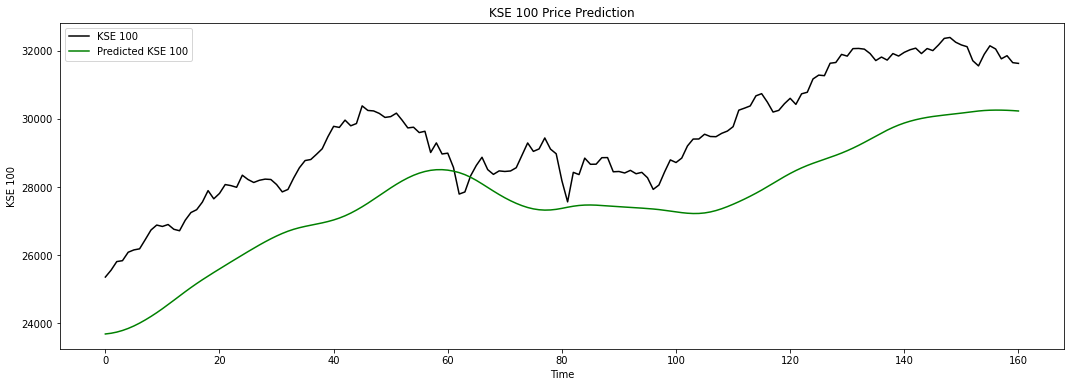

In [91]:
plt.figure(figsize=[18,6])
plt.plot(test_set[60:].values, color = 'black', label = 'KSE 100')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted KSE 100')
plt.title('KSE 100 Price Prediction')
plt.xlabel('Time')
plt.ylabel('KSE 100')
plt.legend()
plt.show()

In [92]:
from sklearn.metrics import mean_absolute_error

In [96]:
mean_absolute_error(test_set[60:],predicted_stock_price.values)

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [99]:
test_set[60:].values.shape

(161, 1)

In [100]:
predicted_stock_price.shape

(161, 1)